## Лабораторная работа 1

Выполнил: 6232-010302D, Пчелкина Ю.Ж.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Моллюск (морское ушко)

Возраст морского ушка определяют, разрезая раковину через конус, окрашивая ее и подсчитывая количество колец под микроскопом.

Для предсказания возраста используются и другие измерения (которые легче получить). 

In [4]:
df = pd.read_csv('abalone.csv', sep=',')

In [5]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Столбцы:

- Sex - Пол (мужской, женский, ребенок). Категориальный признак.

- Length - Длина (самое длинный замер раковины). Вещественный тип.

- Diameter - Диаметр (замеряется перпендикулярно длине). Вещественный тип.

- Height - Высота (моллюск с панцирем). Вещественный тип.

- WholeWeight - Полный вес. Вещественный тип.

- ShuckedWeight - Вес моллюска (без раковины). Вещественный тип.

- VisceraWeight - Вес внутренностей моллюска (после "кровотечения"). Вещественный тип.

- ShellWeight - Вес корпуса (после сушки). Вещественный тип.

- Rings - Кольца (дает возраст в годах). Целочисленный тип.

In [6]:
df1 = df.copy()
df1 = df1.drop(columns = ['Sex', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], axis = 1)
df1.head()

,Length,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


#### 1. "хорошая" визуализация

Зависимость веса, длины и диаметра раковины от "возраста" - почти линейная.

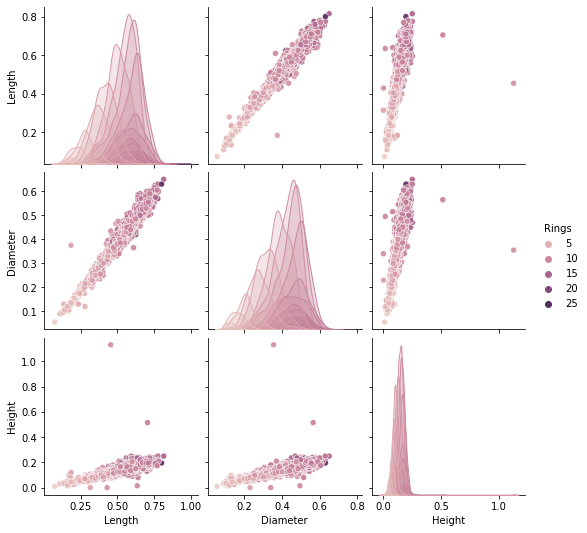

In [7]:
sns.pairplot(df1, hue = 'Rings' )

<AxesSubplot:ylabel='Rings'>

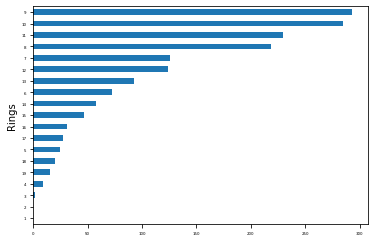

In [8]:
ring1 = df[df['Rings'] < 20].groupby('Rings')['Diameter'].sum().sort_values()
ring1.plot(kind = 'barh', fontsize = 4)

#### 2. "плохая" визуализация

Зависимость диаметра, веса и длины от возраста не очевидна. 

<AxesSubplot:xlabel='Rings'>

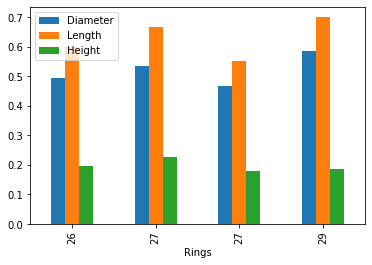

In [9]:
ring2 = df[df['Rings'] > 25].sort_values('Rings')
ring2.plot(x = 'Rings', y = ['Diameter', 'Length', 'Height'], kind = 'bar')

<AxesSubplot:xlabel='Rings'>

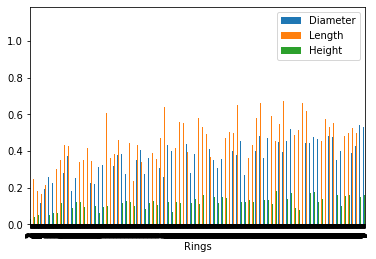

In [10]:
ring3 = df[df['Rings'] < 10].sort_values('Rings')
ring3.plot(x = 'Rings', y = ['Diameter', 'Length', 'Height'], kind = 'bar')

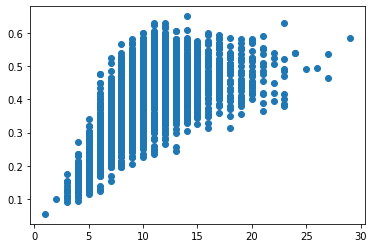

In [11]:
X = np.transpose([df['Rings'].values, df['Diameter'].values])

plt.scatter(X[:,0], X[:,1])

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

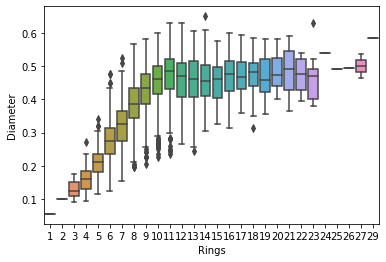

In [12]:
sns.boxplot(x = 'Rings', y = 'Diameter', data = df)